In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('OneDrive/Documents/Machine Learning/graduate-admissions/Admission_Predict.csv')

In [3]:
X = df.iloc[:,1:8]
y = df.iloc[:,8]
msk = np.random.rand(len(df)) < 0.8
X_train,X_test = X[msk], X[~msk]
y_train,y_test = y[msk], y[~msk]


In [4]:
y_train.shape

(306,)

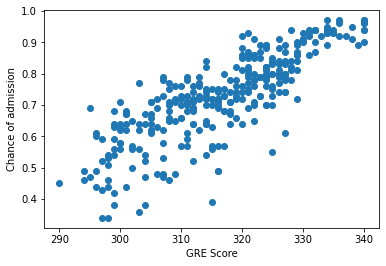

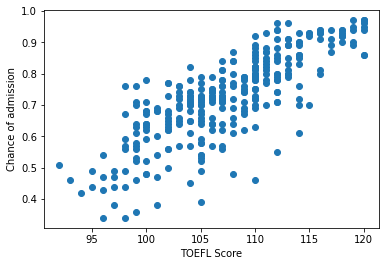

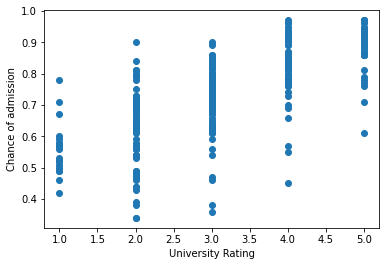

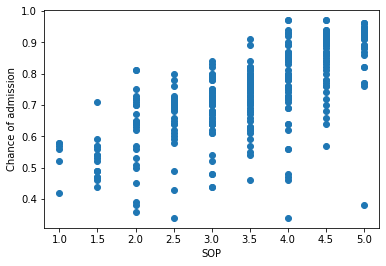

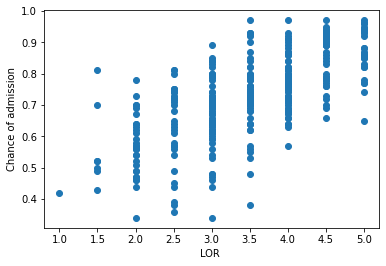

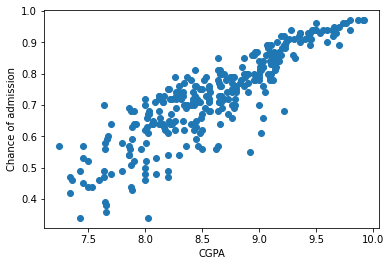

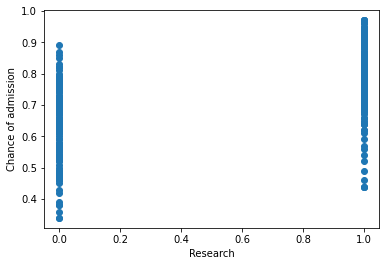

In [5]:
for i in range(0,X_train.shape[1]):
    plt.scatter(X_train.iloc[:,i],y_train)
    plt.xlabel(X_train.columns[i])
    plt.ylabel("Chance of admission")
    plt.show()

In [6]:
X_train = (X_train-np.mean(X_train))/np.std(X_train)


In [7]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.797663,1.759096,0.841642,1.081418,1.114843,1.797312,0.918354
1,0.655679,-0.062226,0.841642,0.590448,1.114843,0.462872,0.918354
2,-0.047080,-0.558950,-0.040353,-0.391492,0.036985,-1.025542,0.918354
3,0.479989,0.434498,-0.040353,0.099478,-1.040872,0.120708,0.918354
4,-0.222770,-0.724525,-0.922347,-1.373432,-0.501943,-0.666270,-1.088905


In [8]:
def Cost(x,y,theta):
    m = len(y)
    return (1/2*m) * np.sum(np.power(np.dot(x,theta)-y,2))

In [9]:
def gradDesc(x,y,theta,a,i):
    for _ in range(i):
        theta = theta - (a/m) * (np.dot(x.T,np.dot(x,theta)-y))
    return theta
def GradDesc(x,y,th,a,i):
    for _ in range(i):
        t = np.dot(x,th)- y
        t = np.dot(x.T,t)
        th = th -(a/m)*t
    return th

In [10]:
(m,n) = X_train.shape
a = 0.01
i = 1500
theta = np.zeros((n+1,1))

In [11]:
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [12]:
ones = np.ones((m,1))
X_train = np.hstack((ones,X_train))
y_train = y_train[:,np.newaxis]

In [13]:
Cost(X_train,y_train,theta)

25593.105600000003

In [14]:
theta = gradDesc(X_train,y_train,theta,a,i)

In [15]:
theta

array([[ 0.72607823],
       [ 0.02670528],
       [ 0.01924402],
       [ 0.00777973],
       [-0.00805143],
       [ 0.0230934 ],
       [ 0.06357372],
       [ 0.00768462]])

In [16]:
Cost(X_train,y_train,theta)

172.70038693495857

In [17]:
def predict(x,theta):
    return np.dot(x,theta)
def accuracy(x,y,theta):
    return 100 -  np.abs(np.mean(y-predict(x,theta)) / np.sum(y)* 100)

In [18]:
ones = np.ones((X_test.shape[0],1))
X_test = np.hstack((ones,X_test))
y_test = y_test[:,np.newaxis]


In [19]:
pred = predict(X_test,theta)
acc = accuracy(X_test,y_test,theta)

In [20]:
print(acc)

83.4401527860835
